## Working with OOI JSON Data

In this example we will learn how to programatically download and work with OOI JSON data from within the notebook. We will use data from the 3D Thermistory Array deployed in the ASHES Vent field at Axial Seamount for this example, but the mechanics apply to all datasets that are processed through the OOI Cyberinfrastructure (CI) system. You wil learn:

* how to find the data you are looking for
* how to use the machine to machine API to request JSON data
* how to explore and plot data

The difference between a NetCDF and JSON data request is that NetCDF files are served asynchronously and delivered to a THREDDS server, while the JSON data response is synchronous (instantaneous) and served as a JSON object in the GET response. NetCDF data is undecimated (full data set), while the JSON response is decimated down to a maximum of 20,000 data points.

Before we get started, login in at https://ooinet.oceanobservatories.org/ and obtain your <b>API username and API token</b> under your profile (top right corner), or use the credential provided below.

In [1]:
username = 'OOIAPI-D8S960UXPK4K03'
token = 'IXL48EQ2XY'

In [2]:
import requests
import datetime

The ingredients being used to build the data_request_url can be found here. For this example, we will use the data from the 3D Thermistor Array (TMPSF) http://ooi.visualocean.net/instruments/view/RS03ASHS-MJ03B-07-TMPSFA301

![RS03ASHS-MJ03B-07-TMPSFA301](../../../../images/RS03ASHS-MJ03B-07-TMPSFA301.png)

In [3]:
subsite = 'RS03ASHS'
node = 'MJ03B'
sensor = '07-TMPSFA301'
method = 'streamed'
stream = 'tmpsf_sample'
beginDT = '2017-09-04T10:01:01.000Z'
endDT = '2017-09-05T10:01:01.000Z'

Send the data request.

In [4]:
base_url = 'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/'

data_request_url ='/'.join((base_url,subsite,node,sensor,method,stream))
params = {
    'beginDT':beginDT,
    'endDT':endDT,
    'limit':1000,   
}

r = requests.get(data_request_url, params=params,auth=(username, token))
data = r.json()

How many data points are in the response?

In [5]:
len(data)

1001

What is returned the first data point?

In [6]:
data[0]

{'temperature14_qc_executed': 29,
 'temperature06_qc_executed': 29,
 'temperature23': 3.297300100326538,
 'temperature24_qc_executed': 29,
 'temperature22': 2.544100046157837,
 'temperature23_qc_results': 29,
 'temperature22_qc_executed': 29,
 'temperature09_qc_executed': 29,
 'temperature03': 3.6041998863220215,
 'temperature02': 2.591599941253662,
 'temperature01': 5.789999961853027,
 'temperature07_qc_results': 29,
 'temperature07': 3.7725000381469727,
 'temperature06': 2.5734000205993652,
 'temperature05': 5.702000141143799,
 'temperature04': 2.6401000022888184,
 'temperature15_qc_results': 29,
 'temperature05_qc_results': 29,
 'temperature09': 2.904099941253662,
 'temperature08': 5.832799911499023,
 'temperature11_qc_results': 29,
 'temperature08_qc_executed': 29,
 'temperature20_qc_executed': 29,
 'driver_timestamp': 3713508060.548236,
 'temperature06_qc_results': 29,
 'battery_voltage': 12.029500007629395,
 'temperature23_qc_executed': 29,
 'temperature16_qc_results': 29,
 'temp

In [7]:
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import netCDF4 as nc
import numpy as np

Time stamps are returned as seconds since 1900-01-01. `nc.num2date(timstamp,'seconds since 1900-01-01')` allows for a quick conversion.

In [8]:
time = []
temperature01 = []

for i in range(len(data)):
    time.append(nc.num2date(data[i]['time'],'seconds since 1900-01-01').replace(microsecond=0))
    temperature01.append(data[i]['temperature01'])

A quick plot shows what appears to be a tidally influenced temperature signal.

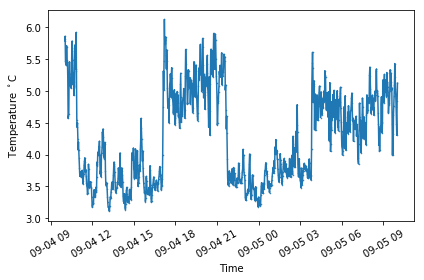

In [9]:
plt.plot(time, temperature01, marker=".", markersize=1, linestyle=None)
plt.ylabel('Temperature $^\circ$C')
plt.xlabel('Time')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

Adding in another measurements from another thermistor we can nicely see that the diffuse fluid might be wafting back and for accross the 3D array with the tidal current.

In [10]:
temperature03 = []
for i in range(len(data)):
    temperature03.append(data[i]['temperature03'])

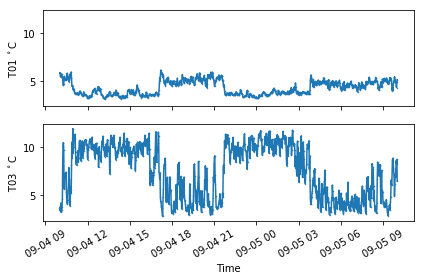

In [11]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True, sharey=True)
ax1.plot(time, temperature01, marker=".", markersize=1, linestyle=None)
ax2.plot(time, temperature03, marker=".", markersize=1, linestyle=None)
ax1.set_ylabel('T01 $^\circ$C')
ax2.set_ylabel('T03 $^\circ$C')
plt.xlabel('Time')
plt.xticks(rotation=30)
plt.tight_layout()
# fig.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in fig.axes[:-1]], visible=False)
plt.show()

Finally, we can pull in some pressure data for a closer look at the tidal relationship.

In [12]:
subsite = 'RS03ASHS'
node = 'MJ03B'
sensor = '09-BOTPTA304'
method = 'streamed'
stream = 'botpt_nano_sample'
beginDT = '2017-09-04T10:01:01.000Z'
endDT = '2017-09-05T10:01:01.000Z'

data_request_url ='/'.join((base_url,subsite,node,sensor,method,stream))
params = {
    'beginDT':beginDT,
    'endDT':endDT,
    'limit':1000,   
}

r = requests.get(data_request_url, params=params,auth=(username, token))
data = r.json()

Extract the pressure variable from the response and convert the time stamps

In [13]:
botpt_time = []
bottom_pressure = []
for i in range(len(data)):
    botpt_time.append(nc.num2date(data[i]['time'],'seconds since 1900-01-01').replace(microsecond=0))
    bottom_pressure.append(data[i]['bottom_pressure'])

Plot co-located temperature 01, 03 and bottom pressure.

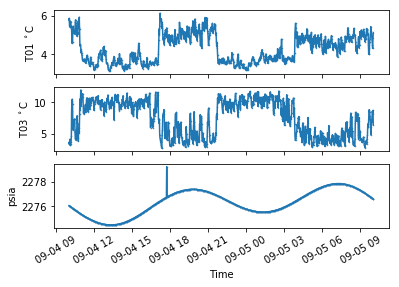

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=False)
ax1.plot(time, temperature01, marker=".", markersize=1, linestyle=None)
ax2.plot(time, temperature03, marker=".", markersize=1, linestyle=None)
ax3.plot(botpt_time, bottom_pressure, marker=".", markersize=1, linestyle=None)
ax1.set_ylabel('T01 $^\circ$C')
ax2.set_ylabel('T03 $^\circ$C')
ax3.set_ylabel('psia')
plt.xlabel('Time')
plt.xticks(rotation=30)
# plt.tight_layout()
# fig.subplots_adjust(hspace=0)
# plt.setp([a.get_xticklabels() for a in fig.axes[:-1]], visible=False)
plt.show()

Plot using bokeh. Example provided by Mike Smith from the OOI Data Team at Rutgers.

In [15]:
# Import Bokeh functions
import os
from bokeh.plotting import figure, output_file, reset_output, show, ColumnDataSource, save
from bokeh.layouts import column
from bokeh.models import BoxAnnotation
from bokeh.io import output_notebook # required to display Bokeh visualization in notebook

In [16]:
source = ColumnDataSource(
    data=dict(
        x=time,
        y1=temperature01,
        y2=temperature03,
        y3=bottom_pressure,
    )
)

s1 = figure(width=600,
           height=400,
           title='Temperature01',
           x_axis_label='Time (GMT)',
           y_axis_label='T01 °C',
           x_axis_type='datetime')

s1.line('x', 'y1', line_width=3, source=source)
s1.circle('x', 'y1', fill_color='white', size=4, source=source)

s2 = figure(width=600,
           height=400,
           title='Temperature01',
           x_axis_label='Time (GMT)',
           y_axis_label='T03 °C',
           x_axis_type='datetime')

s2.line('x', 'y2', line_width=3, source=source)
s2.circle('x', 'y2', fill_color='white', size=4, source=source)

s3 = figure(width=600,
           height=400,
           title='Bottom Pressure',
           x_axis_label='Time (GMT)',
           y_axis_label='psia',
           x_axis_type='datetime')

s3.line('x', 'y3', line_width=3, source=source)
s3.circle('x', 'y3', fill_color='white', size=4, source=source)

output_notebook()
show(column(s1, s2, s3))

# output_file(os.getcwd())
# save(s1, filename='temperature01.html')
# save(s2, filename='temperature03.html')
# save(s3, filename='bottom_pressure.html')

/Users/knuth/miniconda3/envs/ooi/lib/python3.6/site-packages/bokeh/models/sources.py:114: BokehUserWarning: ColumnDataSource's columns must be of the same length. Current lengths: ('x', 1001), ('y1', 1001), ('y2', 1001), ('y3', 1000)
  "Current lengths: %s" % ", ".join(sorted(str((k, len(v))) for k, v in data.items())), BokehUserWarning))


Loading BokehJS ...

For more information on bokeh plotting, check out http://bokeh.pydata.org/en/latest/docs/user_guide/layout.html#rows